# Ans - 1

In [5]:
# 1.  function that convert a decimal integer number into a binary.

def int_to_binary(n):
    if n == 0:
        return "0"
    if n < 0:
        sign = "-"
    else:
        sign = ""
    n = abs(n)
    bits = ""
    while n > 0:
        bits = str(n % 2) + bits
        n //= 2
    return sign + bits


# 2. function that convert a real decimal number into IEEE double floating point representation.

import math
def float_to_ieee(x):
    s = "1" if math.copysign(1.0, x) < 0 else "0"
    ax = abs(x)

    # special cases
    if ax == 0.0:
        return s, "0" * 11, "0" * 52

    if math.isinf(ax):
        return s, "1" * 11, "0" * 52

    if math.isnan(ax):
        return s, "1" * 11, "1" + "0" * 51

    # convert integer and fractional part to binary
    
    integer = int(ax)
    frac = ax - integer

    if integer == 0:
        int_bits = "0"
    else:
        int_bits = ""
        n = integer
        while n > 0:
            int_bits = str(n % 2) + int_bits
            n //= 2

    frac_bits = ""
    f = frac
    for _ in range(60): 
        f *= 2
        if f >= 1:
            frac_bits += "1"
            f -= 1
        else:
            frac_bits += "0"

    full_binary = int_bits + "." + frac_bits
    
    # Normalize to 1.x × 2^E
    if int_bits != "0":
        E = len(int_bits) - 1
        normalized = int_bits[0] + "." + int_bits[1:] + frac_bits
    else:
        first_one = frac_bits.find("1")
        E = -(first_one + 1)
        normalized = "1." + frac_bits[first_one+1:]

    biased = E + 1023
    exponent_bits = f"{biased:011b}"

    mantissa = normalized.split(".")[1][:52]
    mantissa = mantissa.ljust(52, "0")

    return s, exponent_bits, mantissa


# 3. function that convert a machine floating point representation into a real decimal number.


def ieee_to_float(s,e , f):
    """Convert IEEE-754 (sign, exponent bits, fraction bits) to float."""

    sign = -1.0 if s == "1" else 1.0
    exponent_val = int(e, 2)
    fraction_val = 0.0

    # convert fraction bits into number
    power = 0.5
    for bit in f:
        if bit == "1":
            fraction_val += power
        power /= 2

    #  Special cases
    if exponent_val == 0:
        if fraction_val == 0:
            return sign * 0.0
        else:
            # subnormal number
            return sign * (fraction_val) * 2**(-1022)

    if exponent_val == 2047:
        if fraction_val == 0:
            return sign * float("inf")
        else:
            return float("nan")
            
    exponent = exponent_val - 1023
    return sign * (1.0 + fraction_val) * (2**exponent)


# 4. verification of the functions 

x = 13.625

# Convert to IEEE
s, e, f = float_to_ieee(x)
print("IEEE representation:")
print("s =", s)
print("e =", e)
print("f =", f)

# Convert back
y = ieee_to_float(s, e, f)
print("Recovered value:", y)
print("Error =", abs(x - y))


IEEE representation:
s = 0
e = 10000000010
f = 1011010000000000000000000000000000000000000000000000
Recovered value: 13.625
Error = 0.0


# Ans-2

1. (a) Last Gridpoint Accuracy
True Value: 10
Method 1 Last: 10.00000000000000000000  Error: 0.0
Method 2 Last: 9.99999999995201882541  Error: 4.7981174589040165e-11
   (b) Average Value Accuracy
True Average: 5.5
Method 1 Avg: 5.50000000000000088818  Error: 8.881784197001252e-16
Method 2 Avg: 5.50000000001439026676  Error: 1.4390266755981429e-11


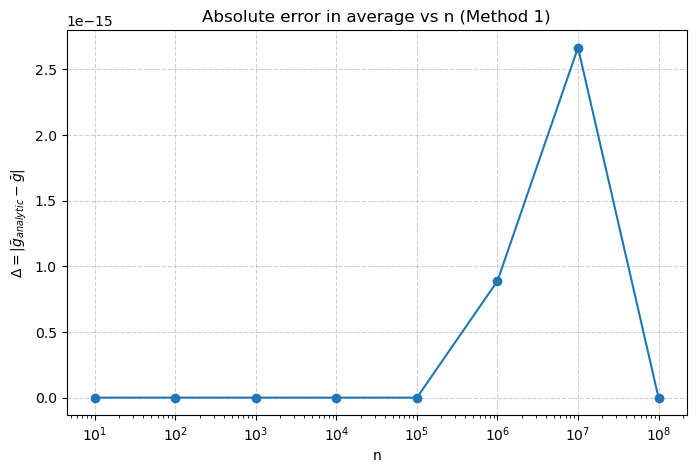

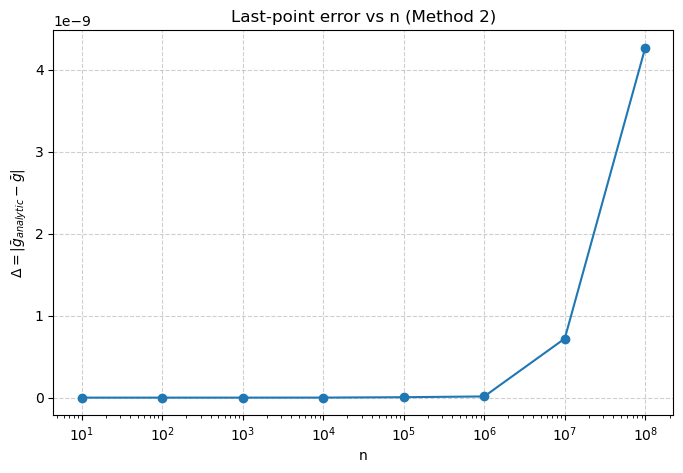

In [20]:
import numpy as np
import matplotlib.pyplot as plt

# The given for two methods is

# method 1 : The ith gridpoint is gi = a + i ∗ h

def method1(a=1, b=10, n=int(1e6)):
    h = (b-a)/(n-1)
    gs = [a+i*h for i in range(n)]
    return gs

# method 2 : The ith gridpoint is gi = g(i−1) + h

def method2(a=1, b=10, n=int(1e6)):
    h = (b-a)/(n-1)
    tmp = a
    gs = [tmp,]
    for i in range(n-1):
        tmp+=h
        gs.append(tmp)
    return gs

# Parameters
a, b, n = 1, 10, int(1e6)

# Generate grids
grid1 = method1(a, b, n)
grid2 = method2(a, b, n)

# Check Last Gridpoint
# The true last point should be exactly 'b'
true_last = b
m1_last = grid1[-1]
m2_last = grid2[-1]

print("1. (a) Last Gridpoint Accuracy")
print(f"True Value: {true_last}")
print(f"Method 1 Last: {m1_last:.20f}  Error: {abs(m1_last - true_last)}")
print(f"Method 2 Last: {m2_last:.20f}  Error: {abs(m2_last - true_last)}")

# --- 2. Check Average ---
# The grid is an arithmetic progression. 
# The theoretical average is simply (a + b) / 2
true_avg = (a + b) / 2
m1_avg = np.mean(grid1)
m2_avg = np.mean(grid2)

print("   (b) Average Value Accuracy")
print(f"True Average: {true_avg}")
print(f"Method 1 Avg: {m1_avg:.20f}  Error: {abs(m1_avg - true_avg)}")
print(f"Method 2 Avg: {m2_avg:.20f}  Error: {abs(m2_avg - true_avg)}")


x_list = []
y_list1 = []
y_list2 = []
real_avg = (a+b)/2

for i in range(1, 9):
    x_list.append(10**i)
    
    avg1 = np.mean(method1(a, b, 10**i))
    y_list1.append(abs(avg1 - real_avg))
    
    avg2 = np.mean(method2(a, b, 10**i))
    y_list2.append(abs(avg2 - real_avg))
    
# Plot Δ vs n

# for Method 1
plt.figure(figsize=(8,5))
plt.plot(x_list, y_list1, marker='o')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel(r'$\Delta = | \bar{g}_{analytic} - \bar{g} |$')
plt.title('Absolute error in average vs n (Method 1)')
plt.grid(True, ls='--', alpha=0.6)
plt.show()

# for Method 2
plt.figure(figsize=(8,5))
plt.plot(x_list, y_list2, marker='o')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel(r'$\Delta = | \bar{g}_{analytic} - \bar{g} |$')
plt.title('Last-point error vs n (Method 2)')
plt.grid(True, ls='--', alpha=0.6)
plt.show()


##### 3. Method 1 (direct formula) is more accurate in floating-point arithmetic because it performs far fewer              operations (no long chain of dependent additions) and accumulates much less rounding error.
#####    The last gridpoint has absolute error zero because we have defined that to be b.
          
#####    Method 2 (recurrent addition) is prone to accumulation of rounding errors: error typically grows with              the number of additions n. That is why we see the average error and last-point error grow with n.
#####    We can see in the graphs that the order of error in method 1 is 1e-15 and in method 2 it is 1e-9.
#####    Hence, method 1 is more accurate than method 2.
          

# Ans-3

1. No, If we have $𝑔′(𝑥^{(𝑘−1)}) = 0$ 
It does not guarantee that $𝑥^{(𝑘)}$ is the exact solution.
In fixed-point iteration, we know that
$$𝑥^{(𝑘)} = 𝑔(𝑥^{(𝑘−1)}), 𝑥^∗ = 𝑔(𝑥^∗)$$
and the error is given by
$$𝜖^𝑘 = 𝑥^{(𝑘)} − 𝑥^∗$$
The Taylor expansion of $𝑔(𝑥^{(𝑘−1)})$ around $𝑥^∗$ upto linear terms is:
$$𝑥^𝑘 − 𝑥^∗ = 𝑔′(𝑥^∗)(𝑥^{(𝑘−1)} − 𝑥^∗)$$
The convergence is due to $𝑔′(𝑥^∗)$
not from $𝑔′(𝑥^{𝑘−1}) = 0$ 

2. The Taylor expansion of $𝑔(𝑥^{(𝑘−1)})$ around the point $𝑥^*$ upto quadratic term is:
$$𝑥^{(𝑘)} − 𝑥^∗ = 𝑔′(𝑥^∗)𝜖^{𝑘−1} +(1/2)𝑔″(𝜉)𝜖^2_{𝑘−1}$$
It means that the convergence is quadratic even if we have $𝑔′(𝑥^{𝑘−1}) = 0$

# Ans-4

In [22]:
# 1. function that gives roots of a quadratic equation

def roots_of_quadratic_equation(a, b, c):
    temp = b**2 - 4*a*c
    return (-b + math.sqrt(temp))/(2*a), (-b - math.sqrt(temp))/(2*a)

# 2. Lets try value of b >> a and c
a = 1/2
b = 10**8
c = 1/2
print(f'for a={a}, b={b} and c={c}, the roots are:')
print(roots_of_quadratic_equation(a, b, c)[0], roots_of_quadratic_equation(a, b, c)[1])

for a=0.5, b=100000000 and c=0.5, the roots are:
0.0 -200000000.0


We can see that when $b^2 >> 4ac$ we have       
        $$\sqrt{b^2 - 4ac} = |b|$$
hence one of root becomes almost zero and other becomes -b/a

As machine cannot represent such small numbers it gives one of the root as zero as shown
in above example.
    

3. The problem arises in calculation of $-b + \sqrt{b^2 - 4ac}$

   We can first calculate the other root $x^0_-$ and then
$$x^0_+ x^0_- = c/a$$



In [28]:
# 4. function using new method

def roots_of_quadratic_equation2(a, b, c):
    temp = b**2 - 4*a*c
    x_neg = (-b - math.sqrt(temp))/(2*a)
    x_pos = (c/a)/x_neg
    return x_neg, x_pos

# 5. (a)
a = 1
b = -3
c = 2
print(f'for a = {a}, b = {b} and c = {c}, the roots are:')
print("old function:", roots_of_quadratic_equation(a, b, c))
print("new function:", roots_of_quadratic_equation2(a, b, c))
print("-----------------------------------")
# (b)
a = -1
b = 10**8 + 10**-8
c = -1
print(f'for a = {a}, b = {b} and c = {c}, the roots are:')
print("old function:", roots_of_quadratic_equation(a, b, c))
print("new function:", roots_of_quadratic_equation2(a, b, c))

for a = 1, b = -3 and c = 2, the roots are:
old function: (2.0, 1.0)
new function: (1.0, 2.0)
-----------------------------------
for a = -1, b = 100000000.00000001 and c = -1, the roots are:
old function: (1.4901161193847656e-08, 100000000.0)
new function: (100000000.0, 1e-08)


The new funtion is clearly better than old function in performing the cases in which b is vary large compared to a and c.

# Ans-5

In [31]:
# 1. The f'(x) is given by

import sympy as smp
x = smp.Symbol('x') 
f = smp.Function('f')(x)
f_given = smp.exp(-x**2/3) * smp.cos(3*x) * smp.sin(3*x)
df_given = smp.diff(f_given, x)
print(f"f'(x) = {df_given}")

f'(x) = -2*x*exp(-x**2/3)*sin(3*x)*cos(3*x)/3 - 3*exp(-x**2/3)*sin(3*x)**2 + 3*exp(-x**2/3)*cos(3*x)**2


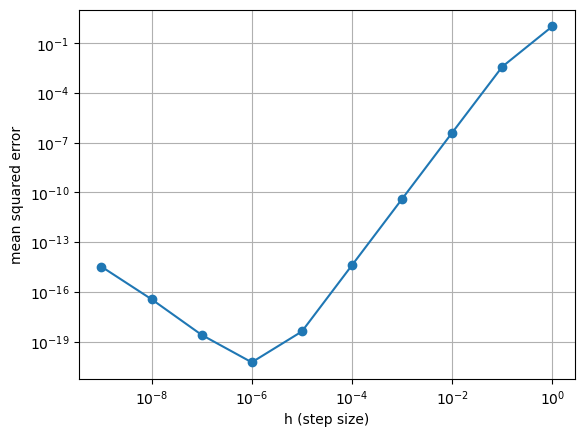

In [41]:
# 2. code for central finite difference

def central_finite_difference(f, x, h):
    return (f(x+h) - f(x-h))/(2*h)

# 3. finding the optimal order of magnitude of h

def f(x):
    return np.exp(-x**2 / 3)*np.sin(3*x)*np.cos(3*x)
def df(x):
    ex1 = -2*x*np.exp(-x**2/3)*np.sin(3*x)*np.cos(3*x)/3
    ex2 = 3*np.exp(-x**2/3)*np.sin(3*x)**2
    ex3 = 3*np.exp(-x**2/3)*np.cos(3*x)**2
    return ex1 - ex2 + ex3

val_array = np.linspace(-5, 5, 10000)
x_list = []
y_list = []
for i in range(0, 10):
    h = 10**(-i)
    x_list.append(h)
    y = np.mean((df(val_array) - central_finite_difference(f, val_array, h))**2)
    y_list.append(y)

plt.loglog(x_list, y_list, marker='o')
plt.xlabel('h (step size)')
plt.ylabel('mean squared error')
plt.grid()
plt.show()


In the graph, we can clearly see that for $h = 10^{-6}$ the round off error and 
truncation error minimizes.

Extremas between [-1, 1] are at:

By analytical method: [ 0.77115 -0.25704  0.25704 -0.77115]

By Secant Method: [-0.77115236 -0.25704067  0.25704067  0.77115236]


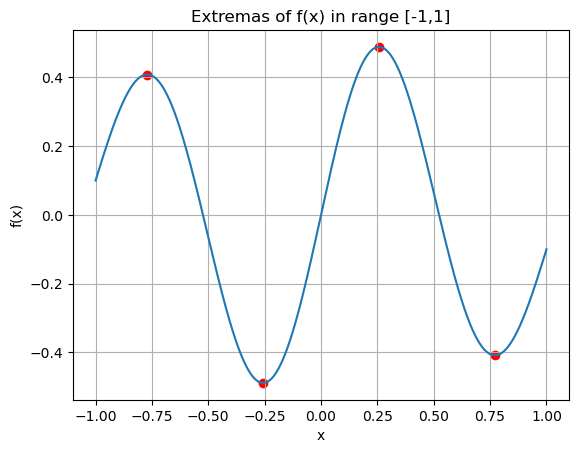

In [57]:
# 4. using secant method

def secant_method(f, x0, x1, tol= 1e-8, max= 100):
    # x0 and x1 are initial guesses
    for i in range(max):
        x2 = x1 - f(x1)*((x1 - x0)/(f(x1) - f(x0)))
        if abs(x2 - x1) < tol:
            return x2
        x0 = x1
        x1 = x2

    return None    # value didn't converge

r1 = secant_method(df, -0.57, -0.78)
r2 = secant_method(df, -0.24, 0.17)
r3 = secant_method(df, 0.03, 0.20)
r4 = secant_method(df, 0.58, 0.71)

roots_analytic = np.array([0.77115, -0.25704, 0.25704, -0.77115])
roots_numeric = np.array([r1, r2, r3, r4])

print('Extremas between [-1, 1] are at:')
print()
print(f'By analytical method: {roots_analytic}')
print()
print(f'By Secant Method: {roots_numeric}')

# plot
x_values = np.linspace(-1, 1, 10000)
plt.plot(x_values, f(x_values))
plt.scatter(roots_numeric, f(roots_numeric), color='r')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Extrema of f(x) in range [-1,1]')
plt.grid()
plt.show()



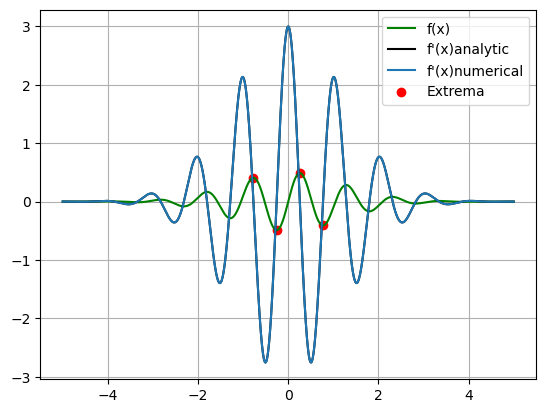

In [58]:
# 5. plots of f(x), f'(x) (numerical and analytical) and location of extrema

x_values = np.linspace(-5, 5, 10000)
plt.plot(x_values, f(x_values), label='f(x)', color= 'g')
plt.plot(x_values, df(x_values), label="f'(x)analytic", color='k')
plt.plot(x_values, central_finite_difference(f, x_values, 10**-6), label="f'(x)numerical")
plt.scatter(roots_numeric, f(roots_numeric), color='r', label='Extrema', marker='o')
plt.grid()
plt.legend()
plt.show()

# Ans-6

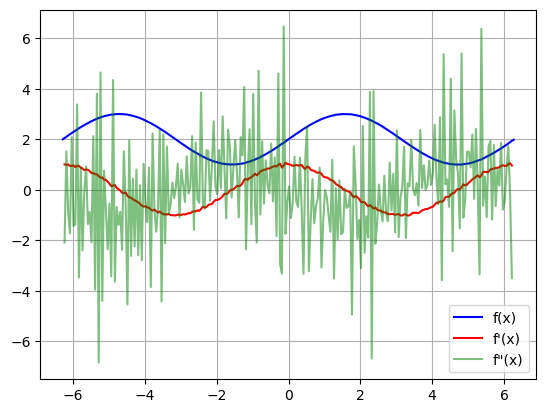

In [64]:
import pandas
df = pandas.read_csv('dataset.csv')
x = np.array(df['x'])
fx = np.array(df['fx'])

# 1. calculating f'(x) using central finite difference

def f_prime(x, fx):
    f_list = []
    for i in range(1, len(x)-1):
        cd = (fx[i+1] - fx[i-1])/(2*(x[i+1] - x[i]))
        f_list.append(cd)
    return np.array(f_list)


# 2. calculating f"(x) using central finite difference

def f_double_prime(x, fx):
    f_list = []
    for i in range(1, len(x)-1):
        cd = (fx[i+1] - 2*fx[i] + fx[i-1]) / ((x[i+1] - x[i])**2)
        f_list.append(cd)
    return np.array(f_list)

# 3 plot of f(x), f'(x) and f"(x) as function of x

fp = f_prime(x, fx)
fpp = f_double_prime(x, fx)

plt.plot(x, fx, color='b', label='f(x)')
plt.plot(x[1:-1], fp, color='r', label="f'(x)")
plt.plot(x[1:-1], fpp, color='g', label='f"(x)', alpha=0.5)
plt.legend()
plt.grid()
plt.show()




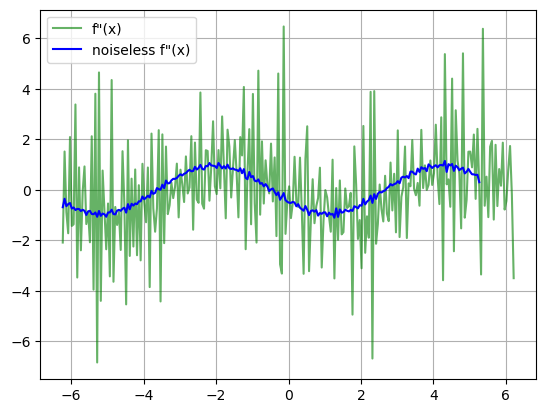

In [68]:
# 4. function as asked in question

def running_average(p, N=20):
    p_avg = []
    for i in range(len(p) - N+1):
        values = p[i: i+N]
        p_avg.append(np.mean(values))
    return np.array(p_avg)

noiseless_fpp = running_average(fpp)
plt.plot(x[1: -1], fpp, color= 'g', label= 'f"(x)', alpha=0.6)
plt.plot(x[1: len(noiseless_fpp)+1], noiseless_fpp, color= 'b', label='noiseless f"(x)')
plt.legend()
plt.grid()
plt.show()

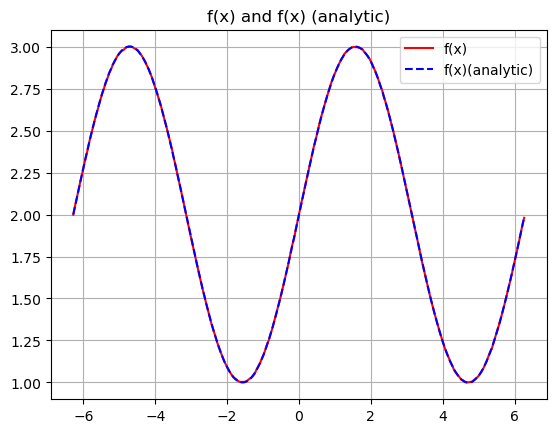

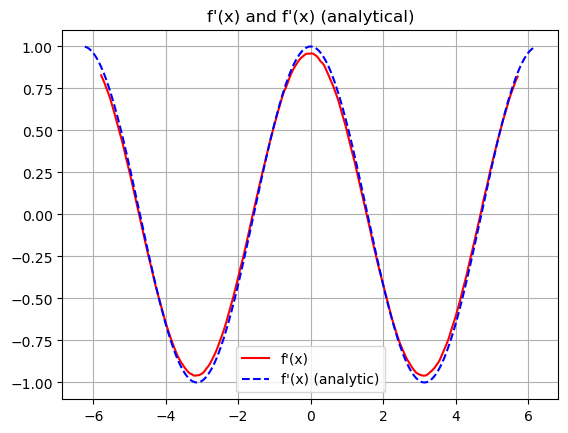

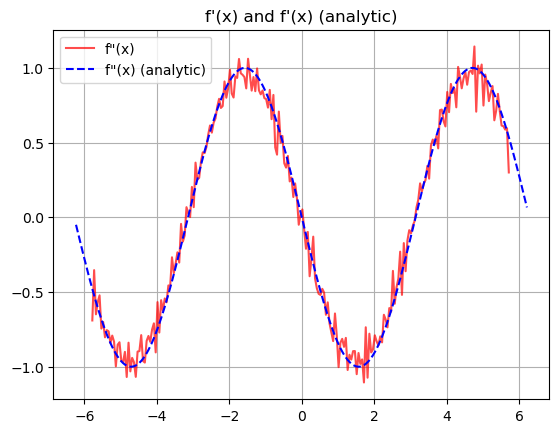

In [76]:
# 7. plot of all the functions

plt.plot(x, fx, label='f(x)', color= 'r')
plt.plot(x, np.sin(x) + 2, label='f(x)(analytic)', color= 'b', linestyle="--")
plt.title('f(x) and f(x) (analytic)')
plt.legend()
plt.grid()
plt.show()

plt.plot(x[10: len(running_average(fp))+10], running_average(fp), label="f'(x)", color='r')
plt.plot(x[1:-1], np.cos(x[1:-1]), label="f'(x) (analytic)", color= 'b', linestyle="--")
plt.title("f'(x) and f'(x) (analytical)")
plt.legend()
plt.grid()
plt.show()

plt.plot(x[10: len(noiseless_fpp)+10], noiseless_fpp, label='f"(x)', color='r', alpha=0.7)
plt.plot(x[1:-1], -np.sin(x[1:-1]), label='f"(x) (analytic)', color= 'b', linestyle="--")
plt.title("f'(x) and f'(x) (analytic)")
plt.legend()
plt.grid()
plt.show()


